# figure showing the probabilistic SMF
The pSMF is measured in `proSMF/nb/smf.ipynb`

In [1]:
import os 
import numpy as np
from astropy.cosmology import Planck13
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## read pSMF files

In [2]:
dat_dir = '/tigress/chhahn/provabgs/svda'

In [3]:
zmins = np.array([0.01, 0.05, 0.09, 0.13, 0.17])
zmaxs = np.array([0.05, 0.09, 0.13, 0.17, 0.21])

In [4]:
# read in stellar mass completeness limits
_Mlims = np.loadtxt(os.path.join(dat_dir, 'psmf.logmstar_comp_limit.dat'), unpack=True, usecols=[2])
Mlims = _Mlims[1::2]

In [5]:
psmfs = [] 
for zmin, zmax in zip(zmins, zmaxs): 
    psmf = np.loadtxt(os.path.join(dat_dir, 'psmf.sv3.bgs_bright.z%.2f_%.2f.dat' % (zmin, zmax)), 
                      skiprows=2)
    psmfs.append(psmf)

In [6]:
psmfs_faint = [] 
for zmin, zmax in zip(zmins, zmaxs): 
    psmf = np.loadtxt(os.path.join(dat_dir, 'psmf.sv3.bgs_faint.z%.2f_%.2f.dat' % (zmin, zmax)), 
                      skiprows=2)
    psmfs_faint.append(psmf)

In [13]:
psmfs_all = [] 
for _smf0, _smf1 in zip(psmfs, psmfs_faint): 
    #psmf = np.loadtxt(os.path.join(dat_dir, 'psmf.sv3.bgs_any.z%.2f_%.2f.dat' % (zmin, zmax)), 
    #                  skiprows=2)
    
    _psmf = np.concatenate([_smf0[:,0][:,None], 
                          (_smf0[:,1] + _smf1[:,1])[:,None], 
                          np.sqrt(_smf0[:,2]**2 + _smf1[:,2]**2)[:,None]], axis=1)
    
    psmfs_all.append(_psmf)

## pSMF $z$ evolution

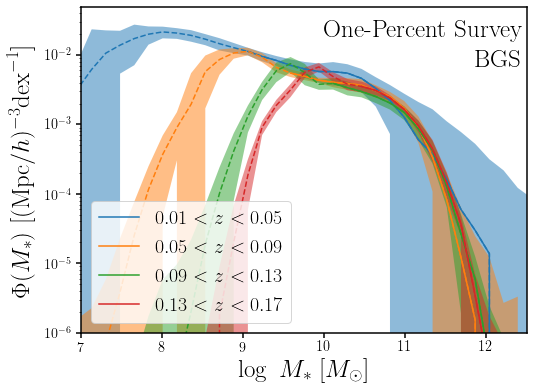

In [14]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
for i, zmin, zmax in zip(range(4), zmins, zmaxs):    
    
    sub.plot(psmfs_all[i][:,0], psmfs_all[i][:,1], color='C%i' % i, ls='--')
    sub.plot(psmfs_all[i][:,0][psmfs_all[i][:,0] > Mlims[i]], 
             (psmfs_all[i][:,1])[psmfs_all[i][:,0] > Mlims[i]], 
             c='C%i' % i, ls='-')
    sub.fill_between(psmfs_all[i][:,0], 
                     psmfs_all[i][:,1] - psmfs_all[i][:,2], 
                     psmfs_all[i][:,1] + psmfs_all[i][:,2], 
                     color='C%i' % i, edgecolor='none', alpha=0.5)
    sub.plot([], [], c='C%i' % i, label='$%.2f < z < %.2f$' % (zmin, zmax))
    
    #sub.step(be[:-1], h, where='pre', color='C%i' % i, linestyle='--')
    #sub.step(be[:-1][be[:-1] > mlim[2*i+1]], h[be[:-1] > mlim[2*i+1]], where='pre', color='C%i' % i, linestyle='-')

sub.legend(loc='lower left', fontsize=20, markerscale=5, frameon=True)
sub.set_xlabel(r'$\log~M_*$  [$M_\odot$]', fontsize=25)
sub.set_xlim(7., 12.5)
sub.set_ylabel(r'$\Phi(M_*)$   [$({\rm Mpc}/h)^{-3}{\rm dex}^{-1}$]', labelpad=10, fontsize=25)
sub.set_yscale('log')
sub.set_ylim(1e-6, 5e-2)
sub.text(0.99, 0.96, 'One-Percent Survey', ha='right', va='top', fontsize=25, transform=sub.transAxes)
sub.text(0.99, 0.87, 'BGS', ha='right', va='top', fontsize=25, transform=sub.transAxes)
fig.savefig('../figs/psmf_bgs_any_zevo.pdf', bbox_inches='tight')

# pSMF comparison
read SMF measurements from the literature

In [15]:
# moustakas+(2013)
# logM* is in Msun/h70^2
# Phi is in Mpc^3/h70^3
m13_logms = np.linspace(9., 12., 31) + np.log10(0.7**2)
m13_logsmf = np.array([-1.899, -1.923, -1.970, -2.031, -2.055, -2.106, -2.144, 
                       -2.179, -2.188, -2.216, -2.234, -2.236, -2.262, -2.252, -2.285, -2.317, -2.365, -2.419, -2.504, -2.607, -2.728, -2.888, -3.104, -3.332, -3.606, -3.953, -4.363, -4.778, -5.255, -5.87, -6.49])
m13_logsmf -= np.log10((Planck13.H0.value / 70)**3)
m13_logsmf_sig = np.array([0.052, 0.048, 0.059, 0.052, 0.050, 0.053, 0.046, 0.051, 0.046, 0.048, 0.047, 0.045, 0.046, 0.049, 0.045, 0.046, 0.049, 0.049, 0.047, 0.046, 0.046, 0.043, 0.041, 0.042, 0.042, 0.047, 0.050, 0.057, 0.066, 0.1, 0.2])

In [16]:
# driver+(2022) GAMA 
# logM* is in Msun/h70^2
# Phi is in Mpc^3/h70^3
d22_logms = np.linspace(6.875, 11.625, 20) + np.log10(0.7**2)
d22_logsmf = np.array([-0.691, -1.084, -1.011, -1.349, -1.287, -1.544, -1.669, -1.688, -1.795, -1.886, 
                       -2.055, -2.142, -2.219, -2.274, -2.292, -2.361, -2.561, -2.922, -3.414, -4.704]) + 0.0807
d22_logsmf -= np.log10((Planck13.H0.value / 70)**3)
d22_logsmf_sig = np.array([0.176, 0.125, 0.071, 0.092, 0.079, 0.071, 0.045, 0.032, 0.024, 0.020, 0.014, 0.010, 
                          0.009, 0.009, 0.009, 0.010, 0.013, 0.019, 0.032, 0.138])

In [31]:
# bernardi+(2018)
b18_logms = np.linspace(9.05, 12.15, 32)
b18_logsmf = np.array([-2.051, -2.075, -2.092, -2.089, -2.118, -2.159, -2.183, -2.208, -2.213, -2.231, 
                      -2.252, -2.240, -2.252, -2.250, -2.274, -2.314, -2.357, -2.421, -2.504, -2.611, 
                       -2.732, -2.885, -3.055, -3.252, -3.472, -3.715, -3.950, -4.254, -4.554, -4.881,
                       -5.321, -5.742])

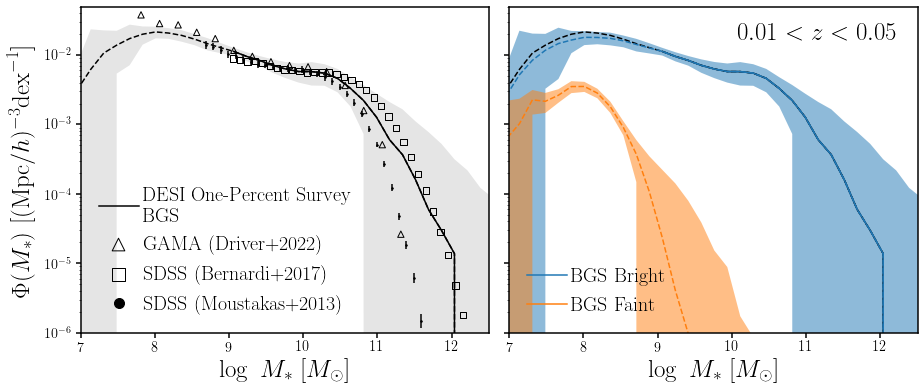

In [34]:
fig = plt.figure(figsize=(15,6))
sub = fig.add_subplot(121)
i = 0

sub.plot(psmfs_all[i][:,0], psmfs_all[i][:,1], color='k', ls='--')
sub.plot(psmfs_all[i][:,0][psmfs_all[i][:,0] > Mlims[i]], 
         psmfs_all[i][:,1][psmfs_all[i][:,0] > Mlims[i]], 
         c='k', ls='-')
sub.fill_between(psmfs_all[i][:,0], 
                 psmfs_all[i][:,1] - psmfs_all[i][:,2], 
                 psmfs_all[i][:,1] + psmfs_all[i][:,2], 
                 color='k', edgecolor='none', alpha=0.1)
sub.errorbar(m13_logms, 10**m13_logsmf, 
             yerr=[10**m13_logsmf - 10**(m13_logsmf - m13_logsmf_sig), 10**(m13_logsmf + m13_logsmf_sig) - 10**m13_logsmf],
             fmt='.k', markersize=3)
sub.scatter(d22_logms, 10**d22_logsmf, marker='^', s=40, facecolor='none', edgecolor='k')
sub.scatter(b18_logms, 10**b18_logsmf, marker='s', s=40, facecolor='none', edgecolor='k')

#             yerr=[10**d22_logsmf - 10**(d22_logsmf - d22_logsmf_sig), 10**(d22_logsmf + d22_logsmf_sig) - 10**d22_logsmf],
#             fmt='.k', markersize=3, label='GAMA (Driver+2022)')
sub.plot([], [], c='k', label=r'DESI One-Percent Survey'+'\n'+'BGS')
sub.errorbar([], [], fmt='.k', markersize=5, label='SDSS (Moustakas+2013)')
sub.scatter([], [], marker='^', s=10, facecolor='none', edgecolor='k', label='GAMA (Driver+2022)')
sub.scatter([], [], marker='s', s=10, facecolor='none', edgecolor='k', label='SDSS (Bernardi+2017)')

sub.legend(loc='lower left', fontsize=20, markerscale=4, handletextpad=0.2)
sub.set_xlabel(r'$\log~M_*$  [$M_\odot$]', fontsize=25)
sub.set_xlim(7., 12.5)
sub.set_ylabel(r'$\Phi(M_*)$  [$({\rm Mpc}/h)^{-3}{\rm dex}^{-1}$]', labelpad=10, fontsize=25)
sub.set_yscale('log')
sub.set_ylim(1e-6, 5e-2)

sub = fig.add_subplot(122)
sub.plot(psmfs_all[i][:,0], psmfs_all[i][:,1], color='k', ls='--')
sub.plot(psmfs_all[i][:,0][psmfs_all[i][:,0] > Mlims[i]], 
         psmfs_all[i][:,1][psmfs_all[i][:,0] > Mlims[i]], 
         c='k', ls='-')
# sub.fill_between(psmfs_all[i][:,0], 
#                  psmfs_all[i][:,1] - psmfs_all[i][:,2], 
#                  psmfs_all[i][:,1] + psmfs_all[i][:,2], 
#                  color='k', edgecolor='none', alpha=0.1)

sub.plot(psmfs[i][:,0], psmfs[i][:,1], color='C0', ls='--')
sub.plot(psmfs[i][:,0][psmfs[i][:,0] > Mlims[i]], psmfs[i][:,1][psmfs[i][:,0] > Mlims[i]], c='C0', ls='-')
sub.fill_between(psmfs[i][:,0], psmfs[i][:,1]-psmfs[i][:,2], psmfs[i][:,1]+psmfs[i][:,2],
                 color='C0', edgecolor='none', alpha=0.5)

sub.plot(psmfs_faint[i][:,0], psmfs_faint[i][:,1], color='C1', ls='--')
sub.fill_between(psmfs_faint[i][:,0], psmfs_faint[i][:,1]-psmfs_faint[i][:,2], psmfs_faint[i][:,1]+psmfs_faint[i][:,2],
                 color='C1', edgecolor='none', alpha=0.5)
sub.plot([], [], c='C0', label=r'BGS Bright')
sub.plot([], [], c='C1', label=r'BGS Faint')

sub.legend(loc='lower left', fontsize=20, markerscale=4, handletextpad=0.2)
sub.set_xlabel(r'$\log~M_*$  [$M_\odot$]', fontsize=25)
sub.set_xlim(7., 12.5)

sub.set_yscale('log')
sub.set_ylim(1e-6, 5e-2)
sub.set_yticklabels([])
sub.text(0.95, 0.95, r'$0.01 < z < 0.05$', ha='right', va='top', fontsize=25, transform=sub.transAxes)
fig.subplots_adjust(wspace=0.05)
fig.savefig('../figs/psmf_bgs_any_comp.pdf', bbox_inches='tight')